# DATAFRAME ANALYSIS:
This is an introduction to Pandas, Numpy, and MatPlotLib for visualization

In [18]:
# The first thing we need to do is import Pandas, Numpy, and MatPlotLib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [19]:
# Lets get started with our own data frame from dictionary data then work with some basic functions

In [20]:
data = {'age':[12, 12, 12, 18, 15, 12],
       'fav_food': ['burgers', 'matza balls', 'cheesy poofs', 'free stuff', 'Bennigans', 'kale juice'],
       'times_died': [0, 0, 0, 98, 0, 0],
       'gender': ['M','M','M','M','M','F']}

labels = ['Stan', 'Kyle', 'Cartman', 'Kenny', 'Butters', 'Wendy' ]

In [21]:
#dataframe 

df = pd.DataFrame(data, index = labels)
df

,age,fav_food,times_died,gender
Stan,12,burgers,0,M
Kyle,12,matza balls,0,M
Cartman,12,cheesy poofs,0,M
Kenny,18,free stuff,98,M
Butters,15,Bennigans,0,M
Wendy,12,kale juice,0,F


In [22]:
# Return the first 3 rows
df[0:3]

,age,fav_food,times_died,gender
Stan,12,burgers,0,M
Kyle,12,matza balls,0,M
Cartman,12,cheesy poofs,0,M


In [23]:
# Different ways to use df.loc
# loc allows you to acess a group of rows or columns by labels or boolean array

In [24]:
# Get the details of Cartman
df.loc['Cartman']

age                     12
fav_food      cheesy poofs
times_died               0
gender                   M
Name: Cartman, dtype: object

In [25]:
# Return the details for Stan and Kyle
df.loc[['Stan', 'Kyle']]

,age,fav_food,times_died,gender
Stan,12,burgers,0,M
Kyle,12,matza balls,0,M


In [26]:
# Who is the kid that has died the most 
df_copy = df.copy()

dead_kid = df.loc[df['times_died'] == df['times_died'].max() ]

dead_kid

,age,fav_food,times_died,gender
Kenny,18,free stuff,98,M


In [32]:
# Return all the males who are younger than 15

under_15_males = df.loc[ (df['gender'] == 'M') & (df['age'] < 15) ]

under_15_males

,age,fav_food,times_died,gender
Stan,12,burgers,0,M
Kyle,12,matza balls,0,M
Cartman,12,cheesy poofs,0,M


In [42]:
# CLASS - return the df for the only female 
female = df.loc[ (df['gender'] == 'F') & (df['age'] < 15) ]
# female = df.loc[(df['gender'] == 'F')]
female

,age,fav_food,times_died,gender
Wendy,12,kale juice,0,F


(array([4., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([12. , 12.6, 13.2, 13.8, 14.4, 15. , 15.6, 16.2, 16.8, 17.4, 18. ]),
 <a list of 10 Patch objects>)

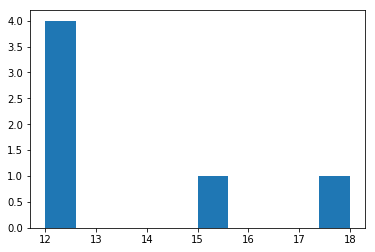

In [44]:
# create a histogram for the ages
# first create a list of the kids ages

list_of_ages = df['age'].tolist()
plt.hist(list_of_ages)

In [12]:
# Lets now learn some additional Panda methods

In [45]:
df['age'].count()

6

In [46]:
df['age'].min()

12

In [47]:
df['age'].mean()

13.5

In [48]:
df['age'].median()

12.0

In [13]:
# Now that we have a basic understanding of simple data analysis in Pandas - let's now dive into time-series analysis 

In [52]:
# lets first import csv and import the bitcoin.csv file 
import csv

# LONG HAND
d = {'Date':[], 'High':[], 'Low':[], 'Close':[] }

with open('bitcoin.csv', 'r') as file:
    rows = csv.reader(file)
    for row in rows:
        d['Date'].append(row[0])
        d['High'].append(row[2])
        d['Low'].append(row[3])
        d['Close'].append(row[4])

df_long_way=pd.DataFrame(d)
df_long_way.head(10)

,Date,High,Low,Close
0,﻿Date,High,Low,Close
1,10/10/2018,6640.29,6538.96,6585.53
2,10/11/2018,6586.74,6243.74,6256.24
3,10/12/2018,6328.5,6236.47,6274.58
4,10/13/2018,6308.51,6259.81,6285.99
5,10/14/2018,6363.21,6280.15,6290.93
6,10/15/2018,6965.06,6258.68,6596.54
7,10/16/2018,6673.59,6571.37,6596.11
8,10/17/2018,6601.21,6517.45,6544.43
9,10/18/2018,6567.54,6450.04,6476.71


In [57]:
df_bitcoin = pd.read_csv( 'bitcoin.csv', parse_dates = True )
df_bitcoin.head(10)

,Date,Open,High,Low,Close,Volume,MarketCap
0,10/10/2018,6640.29,6640.29,6538.96,6585.53,3787650000,1.140310e+11
1,10/11/2018,6586.74,6586.74,6243.74,6256.24,5181640000,1.083420e+11
2,10/12/2018,6239.25,6328.50,6236.47,6274.58,3783500000,1.086700e+11
3,10/13/2018,6278.08,6308.51,6259.81,6285.99,3064030000,1.088780e+11
4,10/14/2018,6288.49,6363.21,6280.15,6290.93,3085320000,1.089730e+11
5,10/15/2018,6292.64,6965.06,6258.68,6596.54,7370770000,1.142800e+11
6,10/16/2018,6601.41,6673.59,6571.37,6596.11,4074800000,1.142840e+11
7,10/17/2018,6590.52,6601.21,6517.45,6544.43,4088420000,1.133990e+11
8,10/18/2018,6542.33,6567.54,6450.04,6476.71,3924080000,1.122370e+11
9,10/19/2018,6478.07,6493.68,6445.31,6465.41,3578870000,1.120530e+11


In [15]:
# Display the 10 most recent entries

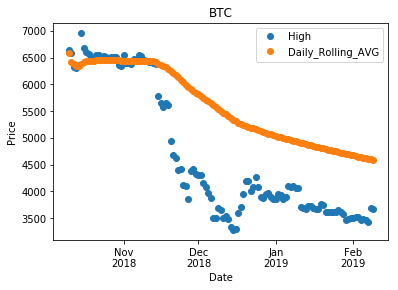

In [71]:
# Lets first visualize the data then add additional columns for analysis 
# Let's reconfigure the date format 
df_bitcoin.Date = pd.to_datetime(df_bitcoin.Date)
df_bitcoin.head(10)


# now let's create some subplots
fig, ax = plt.subplots()


# now let's select which data to add to the graph - we'll do High, Low, and Close
ax.plot_date(df_bitcoin.Date, df_bitcoin.High)
# ax.plot_date(df_bitcoin.Date, df_bitcoin.Low)
# ax.plot_date(df_bitcoin.Date, df_bitcoin.Close)
ax.plot_date(df_bitcoin_expanded.Date, df_bitcoin_expanded.Daily_Rolling_AVG)



# Lets also reformat the axis 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# And now lets label each axis and the graph itself
plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Price')
ax.legend()

In [67]:
# ALWAYS make a copy of the data frame before you mutate it, never mutate the original state
df_bitcoin_expanded = df_bitcoin.copy()

In [69]:
# lets now create a daily rolling average column and then recreate the graph 

df_bitcoin_expanded['Daily_Rolling_AVG'] = df_bitcoin_expanded['Close'].expanding(1).mean()
df_bitcoin_expanded.head(10)

,Date,Open,High,Low,Close,Volume,MarketCap,Daily_Rolling_AVG
0,2018-10-10,6640.29,6640.29,6538.96,6585.53,3787650000,1.140310e+11,6585.530000
1,2018-10-11,6586.74,6586.74,6243.74,6256.24,5181640000,1.083420e+11,6420.885000
2,2018-10-12,6239.25,6328.50,6236.47,6274.58,3783500000,1.086700e+11,6372.116667
3,2018-10-13,6278.08,6308.51,6259.81,6285.99,3064030000,1.088780e+11,6350.585000
4,2018-10-14,6288.49,6363.21,6280.15,6290.93,3085320000,1.089730e+11,6338.654000
5,2018-10-15,6292.64,6965.06,6258.68,6596.54,7370770000,1.142800e+11,6381.635000
6,2018-10-16,6601.41,6673.59,6571.37,6596.11,4074800000,1.142840e+11,6412.274286
7,2018-10-17,6590.52,6601.21,6517.45,6544.43,4088420000,1.133990e+11,6428.793750
8,2018-10-18,6542.33,6567.54,6450.04,6476.71,3924080000,1.122370e+11,6434.117778
9,2018-10-19,6478.07,6493.68,6445.31,6465.41,3578870000,1.120530e+11,6437.247000
